# Forward Pass
```
----------------------------------------------------------------------
Filename : forward-pass.ipynb
Author   : Jaidev Deshpande
Purpose  : Understanding feed forward propagation
Libraries: numpy,sklearn and pandas
----------------------------------------------------------------------
```

In [3]:
# Importing libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [4]:
# Importing iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<img src="images/ann.png" height="50%" width="50%">

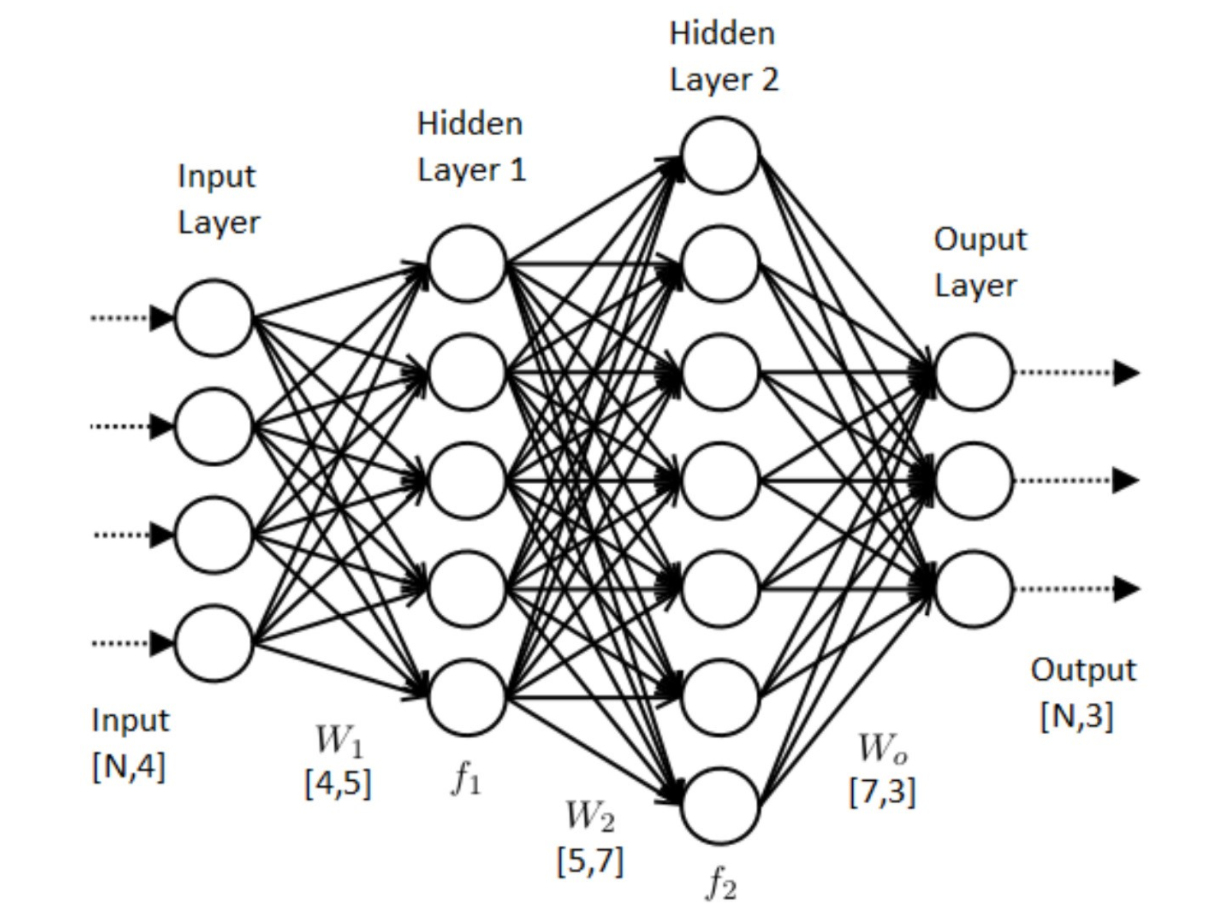

In [3]:
# Defining activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(x):
    return np.exp(x) / np.exp(x).sum()

## Matrix Multiplication
<img src="images/matmul.png" height="50%" width="50%"> 

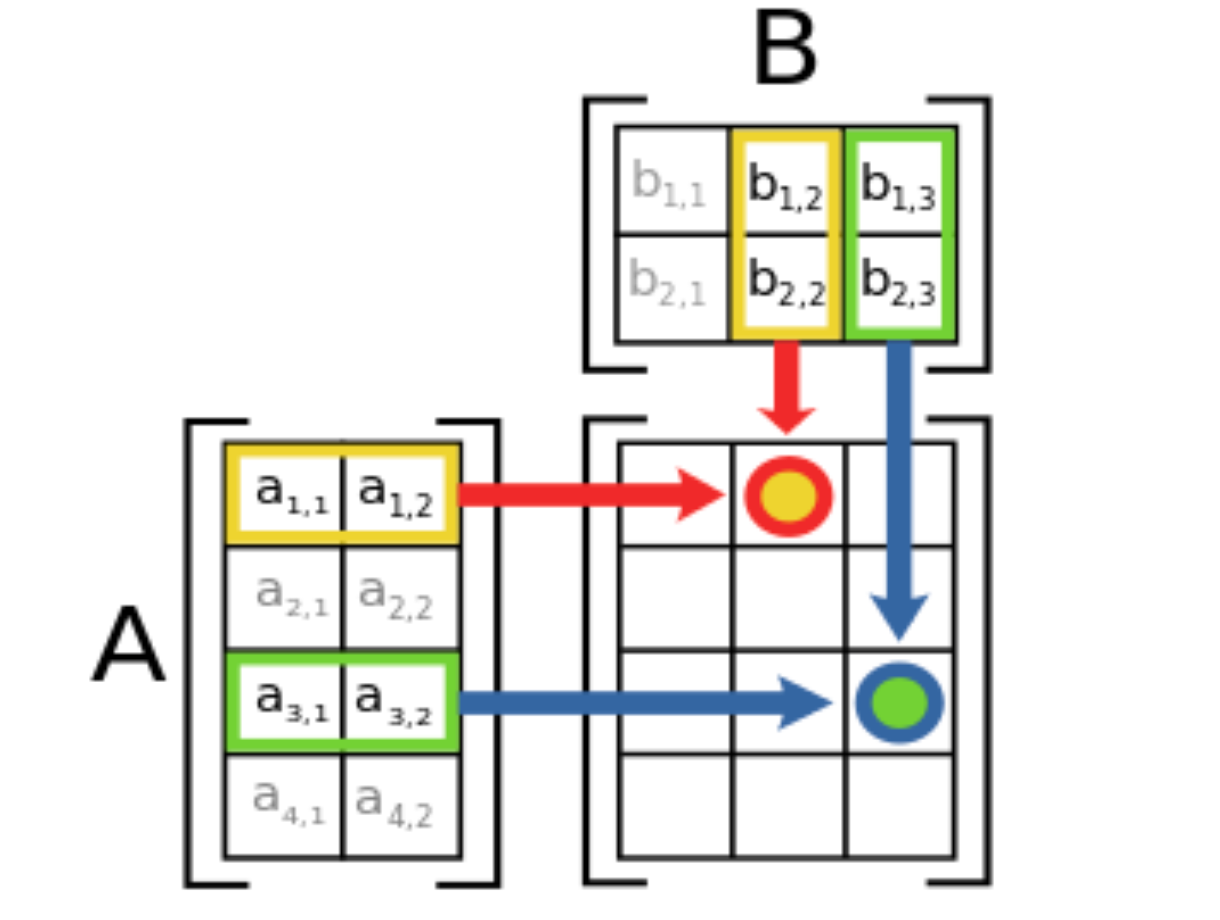

## Layer 1 Weights, Biases and Activation

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x = df.head().values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Weight matrix and bias are randomnly initialised.
The dimensions of the weight matrix are (4,5) because the input layer has 4 neurons and the first hidden layer has 5 neurons as per the neural network architecture

In [6]:
# Randomnly initialising the weights and bias for layer 1
w1 = np.random.rand(4, 5)
b1 = np.random.rand(5)
print(w1.shape)
print(b1.shape)

(4, 5)
(5,)


In [7]:
sample = x[0]
sample

array([5.1, 3.5, 1.4, 0.2])

In [8]:
print(w1)

[[0.62487839 0.99769299 0.92497901 0.39885837 0.85782187]
 [0.58711553 0.14177194 0.21301864 0.11980887 0.62444652]
 [0.37567248 0.20270153 0.33671234 0.42348281 0.63680151]
 [0.71596789 0.09254266 0.82831015 0.76481957 0.04586753]]


In [9]:
# Matrix multiplication of first sample input and weight matrix <𝐱,𝐰> 
a1 = np.dot(sample, w1)
a1

array([5.91091921, 5.88672672, 6.10001751, 3.19934858, 7.46114995])

In [10]:
b1

array([0.28551563, 0.03755294, 0.45391059, 0.58403211, 0.95820869])

In [11]:
# Adding bias <𝐱,𝐰>+ b
a1 + b1

array([6.19643484, 5.92427966, 6.5539281 , 3.78338069, 8.41935863])

In [12]:
# Applying activation functions f(<𝐱,𝐰>+ b) to calculate the output of layer 1
f1 = sigmoid(a1 + b1)
f1

array([0.99796746, 0.9973334 , 0.99857752, 0.97776019, 0.99977949])

## Layer 2: Weights, Biases and Activations

In [13]:
# Randomnly initialising the weights and bias for layer 2
w2 = np.random.rand(5, 7)
b2 = np.random.rand(7)

In [14]:
a2 = np.dot(f1, w2) + b2
a2

array([1.59456946, 2.44144526, 3.75700821, 2.00034713, 3.61018851,
       3.09444584, 2.05922722])

In [15]:
# Calculating the output of layer 2
f2 = sigmoid(a2)
f2

array([0.83125802, 0.9199336 , 0.97717944, 0.88083352, 0.97366551,
       0.95666306, 0.88687666])

## Layer 3: Weights, Biases and Activations

In [16]:
# Randomnly initialising the weights and bias for layer 3
w3 = np.random.rand(7, 3)
b3 = np.random.rand(3)

In [17]:
a3 = np.dot(f2, w3) + b3
a3

array([3.48611285, 3.24392858, 3.45224757])

Softmax activation function is used in the last layer as this is a multiclass classification problem

In [18]:
# Calculating the output of layer 3
f3 = softmax(a3)
f3

array([0.36342317, 0.28525503, 0.3513218 ])